## Cargar librerias y Google Drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os.path,os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')  # importar datos desde el drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/Drive


In [ ]:
import sys
sys.path.append('/content/drive/')
from google.colab.patches import cv2_imshow # libreria para poder ver las imagenes en google colap

#Leer la Base de Datos y Crear Etiquetas

In [ ]:
etiquetas = pd.read_csv('/content/Drive/My Drive/HAM10000/Etiquetas.csv')

In [ ]:
print(etiquetas)

       Unnamed: 0      image_id     dx
0               0  ISIC_0027419    bkl
1               1  ISIC_0025030    bkl
2               2  ISIC_0026769    bkl
3               3  ISIC_0025661    bkl
4               4  ISIC_0031633    bkl
...           ...           ...    ...
10010       10010  ISIC_0033084  akiec
10011       10011  ISIC_0033550  akiec
10012       10012  ISIC_0033536  akiec
10013       10013  ISIC_0032854  akiec
10014       10014  ISIC_0032258    mel

[10015 rows x 3 columns]


In [ ]:
etiquetas['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
print(etiquetas.isna().sum())

Unnamed: 0    0
image_id      0
dx            0
dtype: int64


In [ ]:
label = etiquetas['dx']


In [ ]:
print(label[105])

bkl


In [ ]:
for i in range(0,10015):
   if label[i] == 'nv':
     label[i]=0
   if label[i] == 'mel':
     label[i]=1
   if label[i] == 'bkl':
     label[i]= 2
   if label[i] == 'bcc':
     label[i]= 1
   if label[i] == 'akiec':
     label[i]= 1
   if label[i] == 'vasc':
     label[i]=2
   if label[i] == 'df':
     label[i]=2

In [ ]:
label.value_counts()

0    6705
1    1954
2    1356
Name: dx, dtype: int64

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos/*')))

total training cat images : 10015


In [ ]:
# datos = '/content/Drive/My Drive/HAM10000/Base de Datos'

In [ ]:
datos = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos/*')

In [ ]:
print(datos[1])

In [ ]:
images = etiquetas['image_id']

In [ ]:
print(images[0])

ISIC_0027419


In [ ]:
print(images[10014])

ISIC_0032258


In [ ]:
a =  os.path.join( "/content/Drive/My Drive/HAM10000/Base de Datos/"+images[1] + ".jpg")
print(a)

/content/Drive/My Drive/HAM10000/Base de Datos/ISIC_0025030.jpg


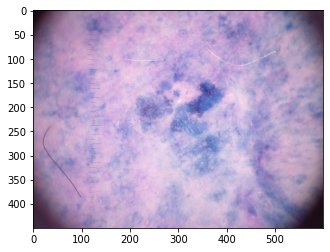

In [ ]:
 imj = cv2.imread(a)
 plt.imshow(imj)

In [ ]:
 imj = cv2.imread(datos[1])
 cv2_imshow(imj)

In [ ]:
label[1] == 'nv'

False

In [ ]:
con =0
con1 =0
for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == "0":
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Temp/Benigno',"img" + j +".jpg"),imj)


   if label[i] == "1":
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Temp/Maligno',"img" + j +".jpg"),imj)


In [ ]:
benigno = glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Temp/Benigno/*')

In [ ]:
 
 imj = cv2.imread(benigno[0])
 cv2_imshow(imj)

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Temp/Benigno/*')))

In [ ]:
print(6704 % 3 )

In [ ]:
con =0
for i in range(0,6704):
   imj = cv2.imread(benigno[i])
   if i % 3 == 0:
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Temp/Benigno2',"img" + j +".jpg"),imj)


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Train/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Validation/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Text/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Train/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Validation/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Clasificados./Text/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base De Datos Pre-Procesada y Aumentada/Train/Benigno/*')))

Benigno  Vz Melanoma

In [ ]:
con =0
con1 =0
for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == 'nv':
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Benigno',"img" + j +".jpg"),imj)

   if label[i] == 'mel':
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Maligno',"img" + j +".jpg"),imj)




In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Benigno/*')))

In [ ]:
print('total training Melanoma images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Maligno/*')))

#Dividir toda la Base de Datos(7 Categorias)

In [ ]:
con =0
con1 =0
con2 =0
con3 =0
con4 =0
con5 =0
con6 =0

for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == 'nv'  :
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/nv',"img" + j +".jpg"),imj)

   if label[i] == 'vasc'  :
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc',"img" + j +".jpg"),imj)

   if label[i] == 'bkl'  :
      con2+=1
      j= str(con2)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl',"img" + j +".jpg"),imj)

   if label[i] == 'df'  :
      con3+=1
      j= str(con3)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df',"img" + j +".jpg"),imj)

   if label[i] == 'akiec'  :
      con4+=1
      j= str(con4)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec',"img" + j +".jpg"),imj)

   if label[i] == 'mel'  :
      con5+=1
      j= str(con5)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/mel',"img" + j +".jpg"),imj)

   if label[i] == 'bcc'  :
      con6+=1
      j= str(con6)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc',"img" + j +".jpg"),imj)



In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/nv/*')))

total training Benigno images : 6705


In [ ]:
print('total training Benigno images :', len(glob.glob('//content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/*')))

total training Benigno images : 142


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl/*')))

total training Benigno images : 1099


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/*')))

total training Benigno images : 115


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec/*')))

total training Benigno images : 327


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/mel/*')))

total training Benigno images : 1113


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc/*')))

total training Benigno images : 514


División de la base de datos(Train,validation y text)

In [ ]:
train_vasc = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_vasc:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/vasc',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/vasc',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/vasc',"img" + j2 +".jpg"),src)



In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/vasc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/vasc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/vasc/*')))

total training Benigno images : 108
total training Benigno images : 23
total training Benigno images : 11


In [ ]:
train_nv = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/nv/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/nv',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/nv',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/nv',"img" + j2 +".jpg"),src)


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/nv/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/nv/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/nv/*')))

total training Benigno images : 5030
total training Benigno images : 1117
total training Benigno images : 558


In [ ]:
train_bkl = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_bkl:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/bkl',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/bkl',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/bkl',"img" + j2 +".jpg"),src)


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/bkl/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/bkl/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/bkl/*')))

total training Benigno images : 825
total training Benigno images : 183
total training Benigno images : 91


In [ ]:
train_df = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_df:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/df',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/df',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/df',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/df/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/df/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/df/*')))

total training Benigno images : 87
total training Benigno images : 19
total training Benigno images : 9


In [ ]:
train_akiec = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_akiec:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/akiec',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/akiec',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/akiec',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/akiec/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/akiec/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/akiec/*')))

total training Benigno images : 246
total training Benigno images : 54
total training Benigno images : 27


In [ ]:
train_mel = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/mel/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_mel:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/mel',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/mel',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/mel',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/mel/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/mel/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/mel/*')))

total training Benigno images : 836
total training Benigno images : 185
total training Benigno images : 92


In [ ]:
train_bcc = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_bcc:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/bcc',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/bcc',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/bcc',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train_Final/bcc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Validation/bcc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Text/bcc/*')))

total training Benigno images : 387
total training Benigno images : 85
total training Benigno images : 42


#7 Categorias__Regularización de los Datos

In [ ]:
train_nv = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/nv/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/nv',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/nv',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/nv',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/nv/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/nv/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/nv/*')))

total training Benigno images : 5030
total training Benigno images : 1117
total training Benigno images : 558


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma/*')))

total training Benigno images : 6016


In [ ]:
train_mel = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_mel:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/mel',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/mel',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/mel',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/mel/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/mel/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/mel/*')))

total training Benigno images : 4513
total training Benigno images : 1002
total training Benigno images : 501


In [ ]:
train_akiec = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/akiec/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_akiec:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/akiec',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/akiec',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/akiec',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/akiec/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/akiec/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/akiec/*')))

total training Benigno images : 4439
total training Benigno images : 986
total training Benigno images : 493


In [ ]:
train_bcc = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bcc/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_bcc:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/bcc',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/bcc',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/bcc',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/bcc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/bcc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/bcc/*')))

total training Benigno images : 4890
total training Benigno images : 1086
total training Benigno images : 543


In [ ]:
train_bkl = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bkl/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_bkl:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/bkl',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/bkl',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/bkl',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/bkl/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/bkl/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/bkl/*')))

total training Benigno images : 4848
total training Benigno images : 1076
total training Benigno images : 538


In [ ]:
train_df = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/df/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_df:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/df',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/df',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/df',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/df/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/df/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/df/*')))

total training Benigno images : 3971
total training Benigno images : 882
total training Benigno images : 441


In [ ]:
train_vasc = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/vasc/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_vasc:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/vasc',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/vasc',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/vasc',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train_final/vasc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Validation/vasc/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Text/vasc/*')))

total training Benigno images : 4510
total training Benigno images : 1001
total training Benigno images : 500


In [ ]:

print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec/*')))

total training Benigno images : 327


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec'
output = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/akiec'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug_1.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 5:
            break

print('')            
print('This is complete!')

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/akiec/*')))

total training Benigno images : 5592


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/akiec/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/akiec',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/akiec/*')))

total training Benigno images : 5919


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc/*')))

total training Benigno images : 514


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc'
output = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bcc'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 18:
            break

print('')            
print('This is complete!')

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bcc/*')))

total training Benigno images : 6005


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bcc/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bcc',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bcc/*')))

total training Benigno images : 6519


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl/*')))

total training Benigno images : 1099


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl'
output = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bkl'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 7:
            break

print('')            
print('This is complete!')

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bkl/*')))

total training Benigno images : 5363


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/bkl/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bkl',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/bkl/*')))

total training Benigno images : 6462


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/*')))

total training Benigno images : 115


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df'
output = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/df'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 62:
            break

print('')            
print('This is complete!')


Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img35.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img36.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img37.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img38.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img39.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img40.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img41.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/img42.jpg
G

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/df/*')))

total training Benigno images : 5179


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/df/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/df',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/df/*')))

total training Benigno images : 5294


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/*')))

total training Benigno images : 142


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc'
output = '/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/vasc'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 62:
            break

print('')            
print('This is complete!')

Loading images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img1.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img2.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img3.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img4.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img5.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img6.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/img7.jpg
Generating new images...

Data Augmentation With: /content/Drive/My Drive/HAM10000/Base de Datos_Clasifi

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/vasc/*')))

total training Benigno images : 5869


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada/Train/vasc/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/vasc',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Base de Datos_Clasificada y Aumentada(7_Clases)/Train/vasc/*')))

total training Benigno images : 6011


#Benigno Vz Maligno

In [ ]:
con =0
con1 =0

for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == 'nv'  or label[i] == 'vasc' or label[i] == 'bkl'  or label[i] == 'df' or label[i] == 'akiec' :
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Benigno',"img" + j +".jpg"),imj)

   if label[i] == 'mel' or label[i] == 'bcc'  : #Carcinoma basocelular
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno',"img" + j +".jpg"),imj)




In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Benigno/*')))

In [ ]:
print('total training Maligno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno/*')))

**Aumento** de la Base de Datos (Melanoma)

In [ ]:
#We import some libraries to use in the process
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import numpy as np
import argparse

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Maligno'
output = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma'

In [ ]:


#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 6:
            break

print('')            
print('This is complete!')

In [ ]:
print('total training Maligno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma/*')))

Copiando imagenes originales (Melanoma)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Maligno/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma',"img" + j +".jpg"),src)

División de la base de datos(Train,validation y text)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_malign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Melanoma',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Melanoma',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Melanoma',"img" + j2 +".jpg"),src)




In [ ]:
train_benign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Benigno/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_benign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12 :
      c2 = c2+1
      j3= str(c2)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Benigno',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
      b = b-1

    if b == 6 :
      b=0
      b1 = b1+1
      j1= str(b1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Benigno',"img" + j1 +".jpg"),src)

    if c == 12 :
      c=0
      c1 = c1+1
      j2= str(c1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Benigno',"img" + j2 +".jpg"),src)



In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train /Melanoma/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Melanoma/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Melanoma/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Melanoma/*')))

Aumento de la Base de Datos (Maligno)

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno'
output = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 6:
            break

print('')            
print('This is complete!')

In [ ]:
print('total training Maligno images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno_2/*')))

Copiando imagenes originales (Maligna)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno_2',"img" + j +".jpg"),src)

División de la base de datos(Train,validation y text)

In [ ]:
train_benign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Benigno/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_benign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)
    if b!=8 and c!=14 :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train_Final/Benigno',"img" + j3 +".jpg"),src)
    if b == 8 and c == 14 :
        b = b-1

    if b == 8 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Validation/Benigno',"img" + j1 +".jpg"),src)
    if c == 14 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Text/Benigno',"img" + j2 +".jpg"),src)




In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno_2/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_malign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)
    if b!=8 and c!=14 :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train_Final/Maligno',"img" + j3 +".jpg"),src)
        
    if b == 8 and c == 14  :
        b = b-1

    if b == 8:
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Validation/Maligno',"img" + j1 +".jpg"),src)
    if c == 14 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Text/Maligno',"img" + j2 +".jpg"),src)



In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train/Maligno_2/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train_Final/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Train_Final/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Validation/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Validation/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Text/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Maligno/Text/Maligno/*')))

# Benigno Vz Melanoma Vz Otros

In [ ]:
con1 =0

for i in range(0,10015):

   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)


   if label[i] == 'bcc' or label[i] == 'vasc' or label[i] == 'bkl'  or label[i] == 'df' or label[i] == 'akiec' : #Carcinoma basocelular
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros',"img" + j +".jpg"),imj)




In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Benigno/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Benigno',"img" + j3 +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Train_Final/Melanoma/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Maligno',"img" + j3 +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Benigno/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Benigno',"img" + j3 +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Validation/Melanoma/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Maligno',"img" + j3 +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Benigno/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Benigno',"img" + j3 +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma/Text/Melanoma/*')

In [ ]:

c2 =0
for element in train_malign:

    src = cv2.imread(element)
    c2 = c2+1
    j3= str(c2)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Maligno',"img" + j3 +".jpg"),src)

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Maligno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Benigno/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Maligno/*')))

Aumento


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros'
output = '/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final',"img" + j +".jpg"),src)

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final/*')))

In [ ]:
train_benign = glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_benign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)
    if b!=7 and c!=14 :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final2',"img" + j3 +".jpg"),src)
    if b == 7 and c == 14 :
        b = b-1

    if b == 7 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Otros',"img" + j1 +".jpg"),src)
    if c == 14 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Otros',"img" + j2 +".jpg"),src)

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final/*')))

total training cat images : 7046


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Train/Otros_Final2/*')))

total training cat images : 5537


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Validation/Otros/*')))

total training cat images : 1006


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno_Vz_Melanoma_Vz_Otros/Text/Otros/*')))

total training cat images : 503


#Melanoma** y otros tipos de cancer


In [ ]:
con =0
con1 =0
for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == 'bcc':
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular ',"img" + j +".jpg"),imj)

   if label[i] == 'mel':
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma',"img" + j +".jpg"),imj)


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma/*')))

total training cat images : 1113


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular /*')))

total training cat images : 514


In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma'
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 4:
            break

print('')            
print('This is complete!')

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular '
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug_1.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 2:
            break

print('')            
print('This is complete!')

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma2',"img" + j +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular /*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2',"img" + j +".jpg"),src)

In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_malign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)
    if b!=4 and c!=7 :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train_final/ Carcinoma basocelular ',"img" + j3 +".jpg"),src)
        
    if b == 4 and c == 7  :
        b = b-1

    if b == 4:
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Validation/ Carcinoma basocelular ',"img" + j1 +".jpg"),src)
    if c == 7 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Text/ Carcinoma basocelular ',"img" + j2 +".jpg"),src)


In [ ]:
train_malign = glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma2/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_malign:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)
    if b!=4 and c!=7 :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train_final/Melanoma',"img" + j3 +".jpg"),src)
        
    if b == 4 and c == 7 :
        b = b-1

    if b == 4:
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Validation/Melanoma',"img" + j1 +".jpg"),src)
    if c == 7 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Text/Melanoma',"img" + j2 +".jpg"),src)


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/Melanoma2/*')))

total training cat images : 4722


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2/*')))


total training cat images : 3930


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train_final/Melanoma/*')))

total training cat images : 2924


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train_final/ Carcinoma basocelular /*')))

total training cat images : 2433


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Validation/Melanoma/*')))

total training cat images : 1124


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Validation/ Carcinoma basocelular /*')))

total training cat images : 936


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Text/Melanoma/*')))

total training cat images : 674


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Text/ Carcinoma basocelular /*')))

total training cat images : 561


# lunas y otros tipos de lesiones benignas

In [ ]:
con =0
con1 =0
con2 = 0
con3 = 0
con4 = 0
for i in range(0,10015):
   b =  os.path.join("/content/Drive/My Drive/HAM10000/Base de Datos/"+images[i]+".jpg")
   imj = cv2.imread(b)
   if label[i] == 'nv':
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/Lunar',"img" + j +".jpg"),imj)

   if label[i] == 'vasc':
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Lesiones Vasculares',"img" + j +".jpg"),imj)

   if label[i] == 'bkl':
      con2+=1
      j= str(con2)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/Lesiones benignas',"img" + j +".jpg"),imj)

   if label[i] == 'df':
      con3+=1
      j= str(con3)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Dermatoﬁbromas',"img" + j +".jpg"),imj)

   if label[i] == 'akiec':
      con4+=1
      j= str(con4)
      cv2.imwrite(os.path.join('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Keratosis acníticas',"img" + j +".jpg"),imj)


In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/Lunar/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Lesiones Vasculares/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/Lesiones benignas/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Dermatoﬁbromas/*')))

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/My Drive/HAM10000/Benigno y otro tipos de lunares benignos/Train/ Keratosis acníticas/*')))

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular'
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular'
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular'
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')

In [ ]:
dataset = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular'
output = '/content/Drive/My Drive/HAM10000/melanoma y otros tipos de cancer/Train/ Carcinoma basocelular_2'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')